# Nearest Neighbors

Nearst neighbor method is a nonparametric method used to density estimation that make few assumptions about the form of the distributions.



In [1]:
import jax
import jax.numpy as jnp 
import numpy as np 
from sklearn.datasets import make_classification
from sklearn.datasets import make_multilabel_classification
import matplotlib.pyplot as plt 

from basic.neighbors import NearestNeighborsDensity
from basic.neighbors import NearestNeighborsClassifier


## Density Estimation


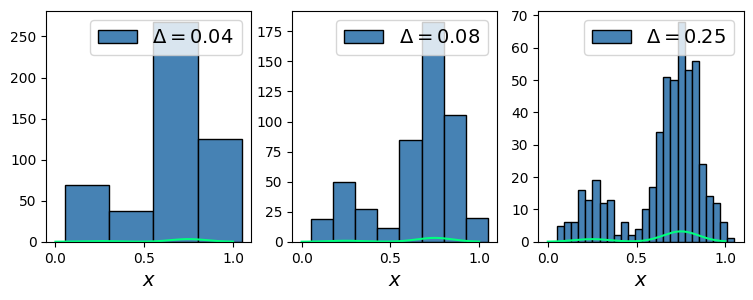

In [12]:
# define a mixture of two Gaussians
means = [0.25, 0.75]
stds = [0.1, 0.1]
ratio = [0.2, 0.8]

x_space = jnp.linspace(0, 1, 1000)
    
gaussian0 = jax.scipy.stats.norm.pdf(x_space, means[0], stds[0])
gaussian1 = jax.scipy.stats.norm.pdf(x_space, means[1], stds[1])

y_space = ratio[0] * gaussian0 + ratio[1] * gaussian1

# sample N points from the mixture
N = 500 
N1 = int(N * ratio[0])
N2 = int(N * ratio[1])

sampled_points = jnp.concatenate([jax.random.normal(jax.random.PRNGKey(0), shape=(N1,)) * stds[0] + means[0],  
                                  jax.random.normal(jax.random.PRNGKey(0), shape=(N2,)) * stds[1] + means[1]])
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.plot(x_space, y_space, color="springgreen")
plt.hist(sampled_points, bins=4, edgecolor="black", color="steelblue", label="$\\Delta=0.04$")
plt.xlabel("$x$", fontsize=14)
plt.legend(fontsize=14)

plt.subplot(1, 3, 2)
plt.plot(x_space, y_space, color="springgreen")
plt.hist(sampled_points, bins=8, edgecolor="black", color="steelblue", label="$\\Delta=0.08$")
plt.xlabel("$x$", fontsize=14)
plt.legend(fontsize=14)

plt.subplot(1, 3, 3)
plt.plot(x_space, y_space, color="springgreen")
plt.hist(sampled_points, bins=25, edgecolor="black", color="steelblue", label="$\\Delta=0.25$")
plt.xlabel("$x$", fontsize=14)
plt.legend(fontsize=14)

plt.show()                             

## Kernel Density Estimator

## Nearest Neighbor Estimator


(1000, 500)
(1000, 500)
(1000, 500)


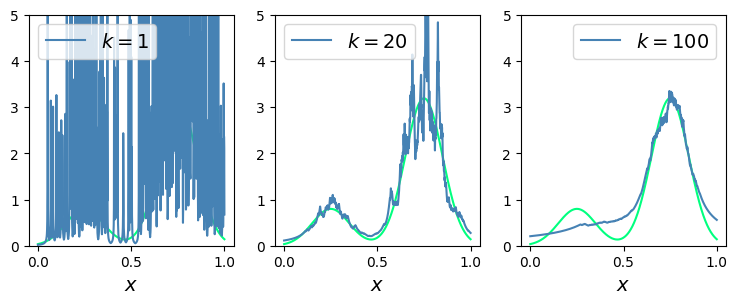

In [18]:
model = NearestNeighborsDensity()

plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.plot(x_space, y_space, color="springgreen")
density = model.predict(sampled_points.reshape(-1,1), x_space.reshape(-1,1), k=1)
plt.plot(x_space, density, color="steelblue", label="$k=1$")
plt.xlabel("$x$", fontsize=14)
plt.ylim(0, 5)
plt.legend(fontsize=14)

plt.subplot(1, 3, 2)
plt.plot(x_space, y_space, color="springgreen")
density = model.predict(sampled_points.reshape(-1,1), x_space.reshape(-1,1), k=20)
plt.plot(x_space, density, color="steelblue", label="$k=20$")
plt.xlabel("$x$", fontsize=14)
plt.ylim(0, 5)
plt.legend(fontsize=14)

plt.subplot(1, 3, 3)
plt.plot(x_space, y_space, color="springgreen")
density = model.predict(sampled_points.reshape(-1,1), x_space.reshape(-1,1), k=100)
plt.plot(x_space, density, color="steelblue", label="$k=100$")
plt.xlabel("$x$", fontsize=14)
plt.ylim(0, 5)
plt.legend(fontsize=14)

plt.show()

We see that the value of K now governs the degree of smoothing and that again there is an optimum choice for K that is neither too large nor too small. Note that the model produced by K nearest neighbours is not a true density model because the integral over all space diverges.

k-NN can also be used for classificiations. The idea is to find the k nearest neighbors and assign the class label by majority vote. The following example shows how to use k-NN for classification.

Text(0.5, 1.0, '$K=11$')

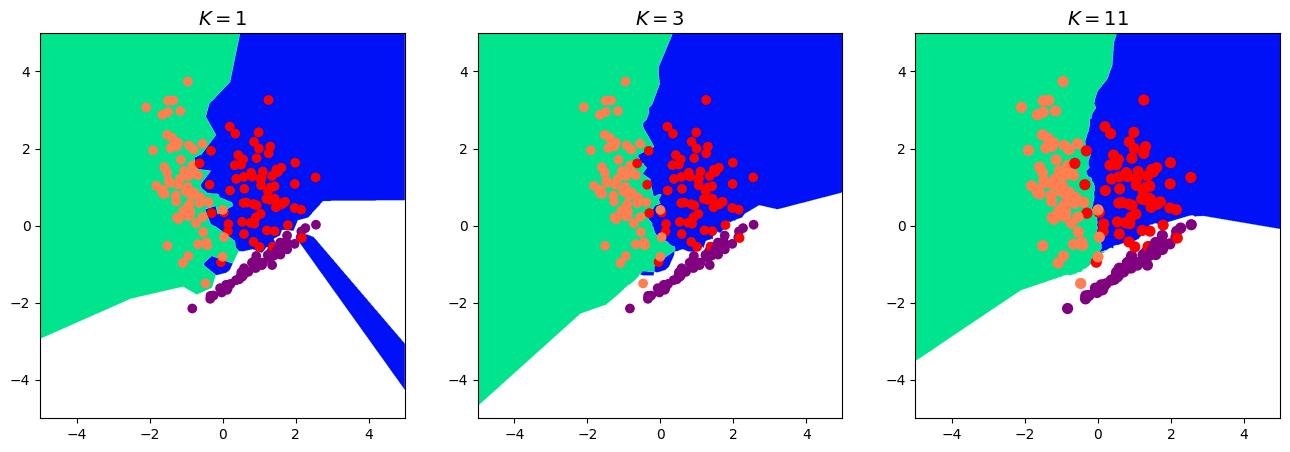

In [19]:
N = 200
D = 2

x, t = make_classification(n_samples=N, 
                            n_features=D, 
                            n_informative=D, 
                            n_redundant=0, 
                            n_repeated=0, 
                            n_classes=3, 
                            n_clusters_per_class=1,
                            random_state=44)
x = jnp.array(x)
t = jnp.array(t)

x_space = jnp.arange(-5, 5, 0.01)
x1, x2 = jnp.meshgrid(x_space, x_space)
x_hat = jnp.vstack((x1.ravel(), x2.ravel())).T

class_colors = []
for i in range(t.shape[0]):
    if t[i] == 0:
        color = "red"
    elif t[i] == 1:
        color = "coral"
    else:
        color = "purple"
    class_colors.append(color)

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
model = NearestNeighborsClassifier()
Z, _, _ = model.predict(x, t, x_hat, k=1)
Z = Z.reshape(-1, 1)

plt.contourf(
    x_space, x_space, Z[:, 0].reshape(x1.shape), cmap="winter", levels=np.arange(-0.1, 1.1, 0.05), antialiased=True
)
plt.scatter(x[:, 0], x[:, 1], color=class_colors)
plt.title("$K=1$", fontsize=14)

plt.subplot(1, 3, 2)
model = NearestNeighborsClassifier()
Z, _, _ = model.predict(x, t, x_hat, k=3)
Z = Z.reshape(-1, 1)
plt.contourf(
    x_space, x_space, Z[:, 0].reshape(x1.shape), cmap="winter", levels=np.arange(-0.1, 1.1, 0.05), antialiased=True
)
plt.scatter(x[:, 0], x[:, 1], color=class_colors)
plt.title("$K=3$", fontsize=14)

plt.subplot(1, 3, 3)
model = NearestNeighborsClassifier()
Z, _, _ = model.predict(x, t, x_hat, k=11)
Z = Z.reshape(-1, 1)
plt.contourf(
    x_space, x_space, Z[:, 0].reshape(x1.shape), cmap="winter", levels=np.arange(-0.1, 1.1, 0.05), antialiased=True
)
plt.scatter(x[:, 0], x[:, 1], color=class_colors, s=50)
plt.title("$K=11$", fontsize=14)
